##Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [1]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [73]:
from sklearn import neighbors
import numpy as np
n_neighbors = 11

clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform') #con "uniform" tutti i punti vicini della stessa classe danno lo stesso score di distannza, hanno la stessa importanza indipendentemente dalla distanza
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print("Scores: " + str(scores))
print("Media degli scores: " + str(np.mean(scores)) + "\n\n")
# shows the model predictions  
for i in range(len(iris.target)):
    #print(iris.data[i,:])
    #print(iris.data[i,:].reshape(1,-1))
    instance=iris.data[i,:].reshape(1,-1)
    #print(clf_knn.predict(instance))
    predicted=clf_knn.predict(instance)[0]
    #print(predicted)
    #if iris.target[i]==predicted:
        #print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    if not iris.target[i] == predicted:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))

Scores: [0.93333333 1.         1.         0.96666667 1.        ]
Media degli scores: 0.9800000000000001


77 nok true class: versicolor; predicted: virginica
83 nok true class: versicolor; predicted: virginica
106 nok true class: virginica; predicted: versicolor
138 nok true class: virginica; predicted: versicolor


In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [70]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') #distance assegnerà l'esempio al cluster più vicino
clf_knn2.fit(iris.data, iris.target)

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    #if iris.target[i]==predicted2:
        #print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    if not (iris.target[i]==predicted2):
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
print("Classification score of k-nn with distance weighting"+"\n")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print("Scores: " + str(scores2))
print("Media degli scores: " + str(np.mean(scores2)))

Classification score of k-nn with distance weighting

Scores: [0.96666667 1.         1.         0.96666667 1.        ]
Media degli scores: 0.9866666666666667


The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

In [ ]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k neighbors="+str(n_neighbors))
    print("accuracy="+str(clf_knn3.score(X_test, y_test)))
    
print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k n

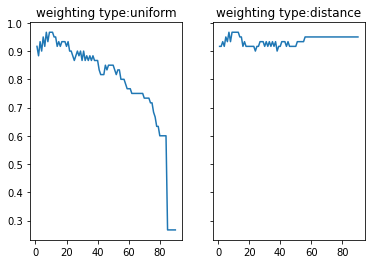

In [71]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

**Qua vediamo la differenza di performance tra _uniform_  e _distance_. COme si nota con _distance_ otteniamo performance migliori perchè con _uniform_, aumentando il numero di vicini, avremo sempre di più una situazione con un cluster per ogni esempio (praticamente avremo una situazione con numero vicini=numero di esempi) andando a peggiorare progressivamente l'efficenza**

In [ ]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


#Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica.


In [11]:
colors = [0]*len(iris.data)
for i in range(len(iris.data)):
  if(iris.target[i]==0): # setosa
    colors[i] = 'r'
  elif(iris.target[i]==1): # versicolor
    colors[i] = 'b'
  else: # virginica
    colors[i] = 'g'


In [19]:
# iris.data[:, 0], iris.data[:, 1] # sepal lenght and sepal width
# iris.data[:, 2], iris.data[:, 3] # petal lenght and petal width

array([4.7, 3.2, 1.3, 0.2])

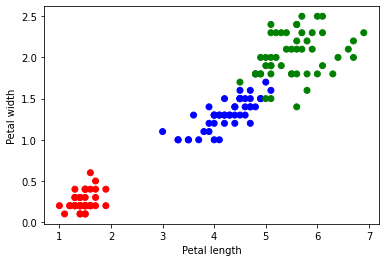

In [20]:
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=colors) # prendiamo 2 features (petal lenght and petal width) per poter plottare in 2 dimensioni
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

Notiamo che la (come abbiamo visto nel notebook precedente) la classe **Setosa**, è ben distanziata mentre **Versicolor** e **Virginica** hanno alcuni esempi che si intrecciano 

# What you have to do: 
##1. Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


In [23]:
from sklearn.model_selection import train_test_split
n_neighbors = 7 #abbiamo visto che è il miglior k da usare
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=300)
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') #usiamo distance perchè abbiamo notato essere meglio di uniform
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [31]:
#coloriamo in base alla predizione
colors_pred = [0]*len(y_pred)
for i in range(len(X_test)):
  if(y_pred[i]==0): # setosa
    colors_pred[i] = 'r'
  elif(y_pred[i]==1): # versicolor
    colors_pred[i] = 'b'
  else: # virginica
    colors_pred[i] = 'g'

#coloriamo in base alla loro vera etichetta
colors_true = [0]*len(y_test)
for i in range(len(X_test)):
  if(y_test[i]==0): # setosa
    colors_pred[i] = 'r'
  elif(y_test[i]==1): # versicolor
    colors_pred[i] = 'b'
  else: # virginica
    colors_true[i] = 'g'


In [27]:
mispredicted

[18, 26]

In [33]:
mispredicted = list(np.where(y_pred!=y_test)[0]) # esempi classificati male
for i in mispredicted:
  colors_pred[i] = "orange" # colora di arancione gli esempi malclassificati


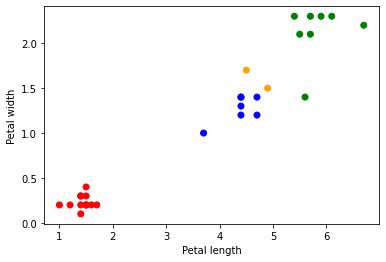

In [34]:
plt.scatter(X_test[:, 2], X_test[:, 3], c=colors_pred)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

Notiamo che le previsioni sono molto simili a quelle plottate prima con il dataset, ma notiamo però che ci sono due esempi **malclassificati** (in arancione) infatti non sono stati ben classificati 2 esempi di **Virginica** i quali sono stati erroneamente classificati come **Versicolor**

#2. Plot the ROC plot of the k-nn (for the best value of k) for each of the three classes: setosa, virginica and versicolor
#3. Plot the ROC plot for the best decision tree you trained in Exercize n.1  
#4. Compare decision trees and k-nn on the ROC space: for which values of (TPR,FPR) k-nn is better than decision trees?

In [35]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def roc_plot(num_classes, y_pred, y_true, title, ax):
  fpr = {}
  tpr = {}
  roc = {}

  for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc[i] = auc(fpr[i], tpr[i])
  
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(num_classes):
    mean_tpr+=interp(all_fpr, fpr[i], tpr[i])
  mean_tpr/=num_classes

  fpr["mean"] = all_fpr
  tpr["mean"] = mean_tpr
  roc["mean"] = auc(fpr["mean"], tpr["mean"])

  ax.plot(fpr["mean"], tpr["mean"], label="ROC curve (area = {:0.2f})".format(roc["mean"]), color="blue", linestyle=":")

  colors = cycle(["red", "aqua", "yellow"])
  for i, color in zip(range(num_classes), colors):
    ax.plot(fpr[i], tpr[i], color=color, label="ROC curve for {0} (area = {1:0.2f})".format(iris.target_names[i], roc[i]))

  ax.set_xlabel("FPR")
  ax.set_ylabel("TPR")
  ax.legend(loc="best")
  ax.plot([0,1], [0,1], 'k--')
  ax.set_title(title)
  #plt.show()



In [36]:
from sklearn.model_selection import train_test_split
n_neighbors = 7

knn_classifier = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
tree_classifier = tree.DecisionTreeClassifier(class_weight="balanced", max_depth=2)

# fit knn classifier on training set
knn_classifier.fit(X_train, y_train)
knn_pred = clf.predict(X_test)

# fit tree classifier on training set
tree_classifier.fit(X_train, y_train)
tree_pred = clf.predict(X_test)

In [37]:
knn_prob = knn_classifier.predict_proba(X_test)
knn_actual_prob = np.zeros((y_test.size, 3))
for i,y in np.ndenumerate(y_test):
  knn_actual_prob[i,y]=1

tree_prob = tree_classifier.predict_proba(X_test)
tree_actual_prob = np.zeros((y_test.size, 3))
for i,y in np.ndenumerate(y_test):
  tree_actual_prob[i,y]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


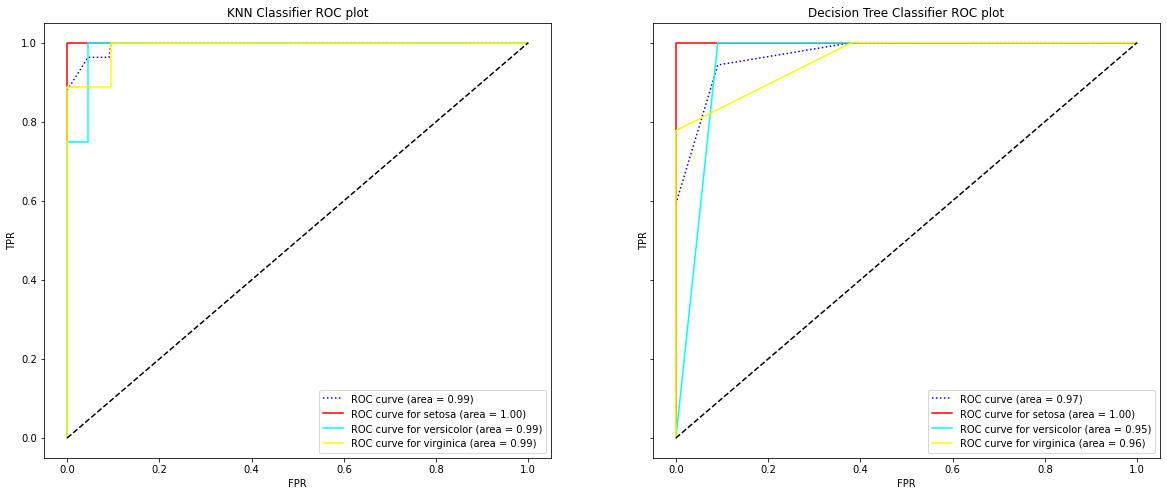

In [38]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(20,8))
roc_plot(3, knn_prob, knn_actual_prob, "KNN Classifier ROC plot", ax[0])
roc_plot(3, tree_prob, tree_actual_prob, "Decision Tree Classifier ROC plot", ax[1])

Da questo confronto del ROC plot del KNN e del Decision Tree notiamo che il KNN performa meglio in quanto l'area sotto la curva del KNN è maggiore di quella del Decision Tree (0.99 (knn) > 0.97 (decision_tree).

Questo lo si nota anche andando a vedere nelle singole classi come il KNN performi meglio l'area sotto la curva rispetto al Decision Tree:


*   **KNN** --> (**Versicolor** 0.99) - (**Virginica** 0.99)
*   **Decision Tree** --> (**Versicolor** 0.95) - (**Virginica** 0.96)


#5. In the following, extend the above exercize on k-nn using a kernel function  
K(x,y) for the distances computation, such that distance(x,y)=1-K(x,y).    Use a Gaussian-like (or Radial Basis Function) kernel K(x,y)=exp(-gamma(x-y)^2), with gamma the inverse of the sigma squared variance, that must be tuned to the best value according to the accuracy reached by the k-nn, with k=7 (similarly as done with the previous example on tuning the parameter n_neightbors).

**Sostanzialmente al posto che adottare un approccio lineare utilizziamo una funzione radiale**

In [56]:
#definiamo la funzione per la gaussiana che accetta dei valori e restituisce le distanze (che saranno i nostri pesi)
def gaussian(sigma):
  def distance(dist):
    x = -(dist/(2*sigma**2))
    f_x = np.exp(x)
    return f_x
  return distance

n_neighbors = 7
best_sigma = 0
best_accuracy = 0
for sigma in np.linspace(0.01, 10, 100): #generiamo 100 valori di sigma
  clf = neighbors.KNeighborsClassifier(n_neighbors, weights=gaussian(sigma), metric="euclidean") # in weights questa volta non usiamo "distance" ma appunto usiamo la nostra funzione "gaussian"
  scores = cross_val_score(clf, iris.data, iris.target, cv=5)
  score = np.mean(scores)
  if score > best_accuracy:
    best_accuracy = score
    best_sigma = sigma
best_accuracy, best_sigma

(0.9800000000000001, 0.41363636363636364)

Notiamo che abbiamo un'accuratezza di 0.98 e il nostro miglior sigma è 0.36.

Proviamo ora a plottare questi risultati e vedere quindi la curva ROC..ma prima proviamo a fare la stessa cosa fatta prima senza però usare la Cross Validation

In [62]:
kernel_clf = neighbors.KNeighborsClassifier(n_neighbors, weights=gaussian(best_sigma), metric="euclidean")
kernel_clf.fit(X_train, y_train)
kernel_clf.score(X_test, y_test)

0.9333333333333333

Senza usare Cross Validation (CV), quindi basandoci solo sullo split otteniamo performance peggiori 0.93 a scapito di 0.98 con CV

In [60]:
kernel_prob = kernel_clf.predict_proba(X_test)
kernel_actual_prob = np.zeros((y_test.size, 3))
for i,y in np.ndenumerate(y_test):
  kernel_actual_prob[i,y]=1

In [59]:
def roc_plot(num_classes, y_pred, y_true):
  fpr = {}
  tpr = {}
  roc = {}

  for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc[i] = auc(fpr[i], tpr[i])
  
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(num_classes):
    mean_tpr+=interp(all_fpr, fpr[i], tpr[i])
  mean_tpr/=num_classes

  fpr["mean"] = all_fpr
  tpr["mean"] = mean_tpr
  roc["mean"] = auc(fpr["mean"], tpr["mean"])

  plt.plot(fpr["mean"], tpr["mean"], label="ROC curve (area = {:0.2f})".format(roc["mean"]), color="blue", linestyle=":")

  colors = cycle(["red", "aqua", "yellow"])
  for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label="ROC curve for {0} (area = {1:0.2f})".format(iris.target_names[i], roc[i]))

  plt.xlabel("fpr")
  plt.ylabel("tpr")
  plt.legend(loc="best")
  plt.plot([0,1], [0,1], 'k--')
  plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]


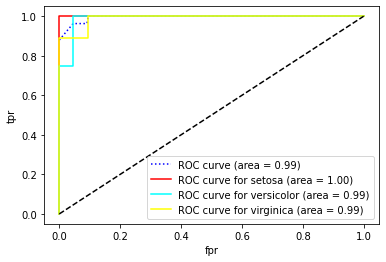

In [48]:
roc_plot(3, kernel_prob, kernel_actual_prob)

Le performance sono prettamente quelle ottenute in precedenza viste con il KNN non notiamo grosse differenze sull'accuratezza